# Customer Segmentation with Python

## 1. Understand the problem and Business Case

In this project, we are provided with a dataset containing customer information from a bank over the past six months. The data includes variables such as transaction frequency, transaction amounts, tenure, and other relevant features.

As data scientists, our task is to utilize artificial intelligence and machine learning techniques to classify customers into at least three distinct groups. The marketing team will use the results of this classification to optimize their marketing campaigns and strategies.

## 2. Import libraries & Load data

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Other useful libraries
import warnings

warnings.filterwarnings("ignore")

# For additional visualization (optional)
import plotly.express as px
import plotly.graph_objs as go

# For display text as Markdown
from IPython.display import display, Markdown

# from jupyterthemes import jtplot
# jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid=False )

In [2]:
# Read data

data = pd.read_csv("marketing_data.csv")
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

| Field Name                         | Description                                                                                                               |
|------------------------------------|---------------------------------------------------------------------------------------------------------------------------|
| CUSTID                             | Identification of Credit Card holder                                                                                      |
| BALANCE                            | Balance amount left in customer's account to make purchases                                                               |
| BALANCE_FREQUENCY                  | How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)         |
| PURCHASES                          | Amount of purchases made from account                                                                                     |
| ONEOFFPURCHASES                    | Maximum purchase amount done in one-go                                                                                    |
| INSTALLMENTS_PURCHASES             | Amount of purchase done in installment                                                                                    |
| CASH_ADVANCE                       | Cash in advance given by the user                                                                                         |
| PURCHASES_FREQUENCY                | How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)|
| ONEOFF_PURCHASES_FREQUENCY         | How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)                 |
| PURCHASES_INSTALLMENTS_FREQUENCY   | How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)                    |
| CASH_ADVANCE_FREQUENCY             | How frequently the cash in advance being paid                                                                             |
| CASH_ADVANCE_TRX                   | Number of Transactions made with "Cash in Advance"                                                                        |
| PURCHASES_TRX                      | Number of purchase transactions made                                                                                      |
| CREDIT_LIMIT                       | Limit of Credit Card for user                                                                                             |
| PAYMENTS                           | Amount of Payment done by user                                                                                            |
| MINIMUM_PAYMENTS                   | Minimum amount of payments made by user                                                                                   |
| PRC_FULL_PAYMENT                   | Percent of full payment paid by user                                                                                      |
| TENURE                             | Tenure of credit card service for user                                                                                    |


## 3. Exploratory Data Analysis (EDA)

Let's check the basic statistics and visualize some features:

### Descriptive statistics

In [4]:
# Display basic statistics
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


**Key Insights from Descriptive Statistics:**

- The mean balance of customers is approximately $1,564.
- The balance frequency is updated frequently, with an average of around 0.9.
- The average purchase amount is about $1,000.
- The mean one-off purchase amount is roughly $600.
- The average purchases frequency is around 0.5.
- The average frequencies for one-off purchases, installment purchases, and cash advances are generally low.
- The average credit limit for customers is around $4,500.
- The percentage of full payments made is 15%.
- The average tenure of customers is 11 years.


<Axes: >

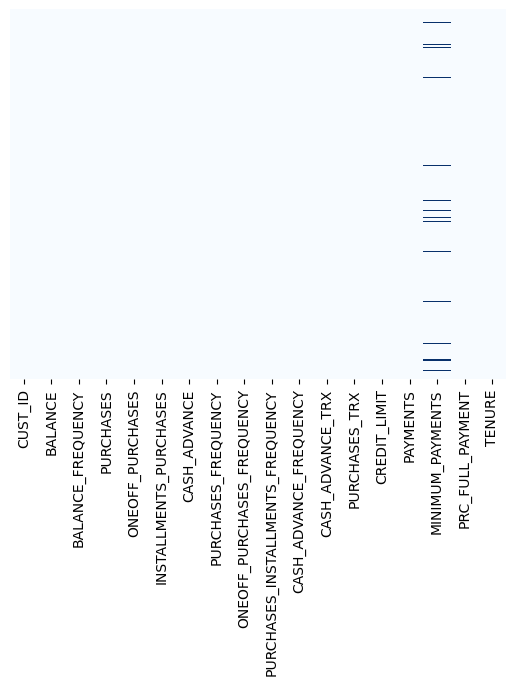

In [5]:
# Let's see if we have any missing data
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap="Blues")

In [6]:
# Check for missing values
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

There are missing data in `MINIMUM_PAYMENTS` and `CREDIT_LIMIT`.

### Distributions of numerical features

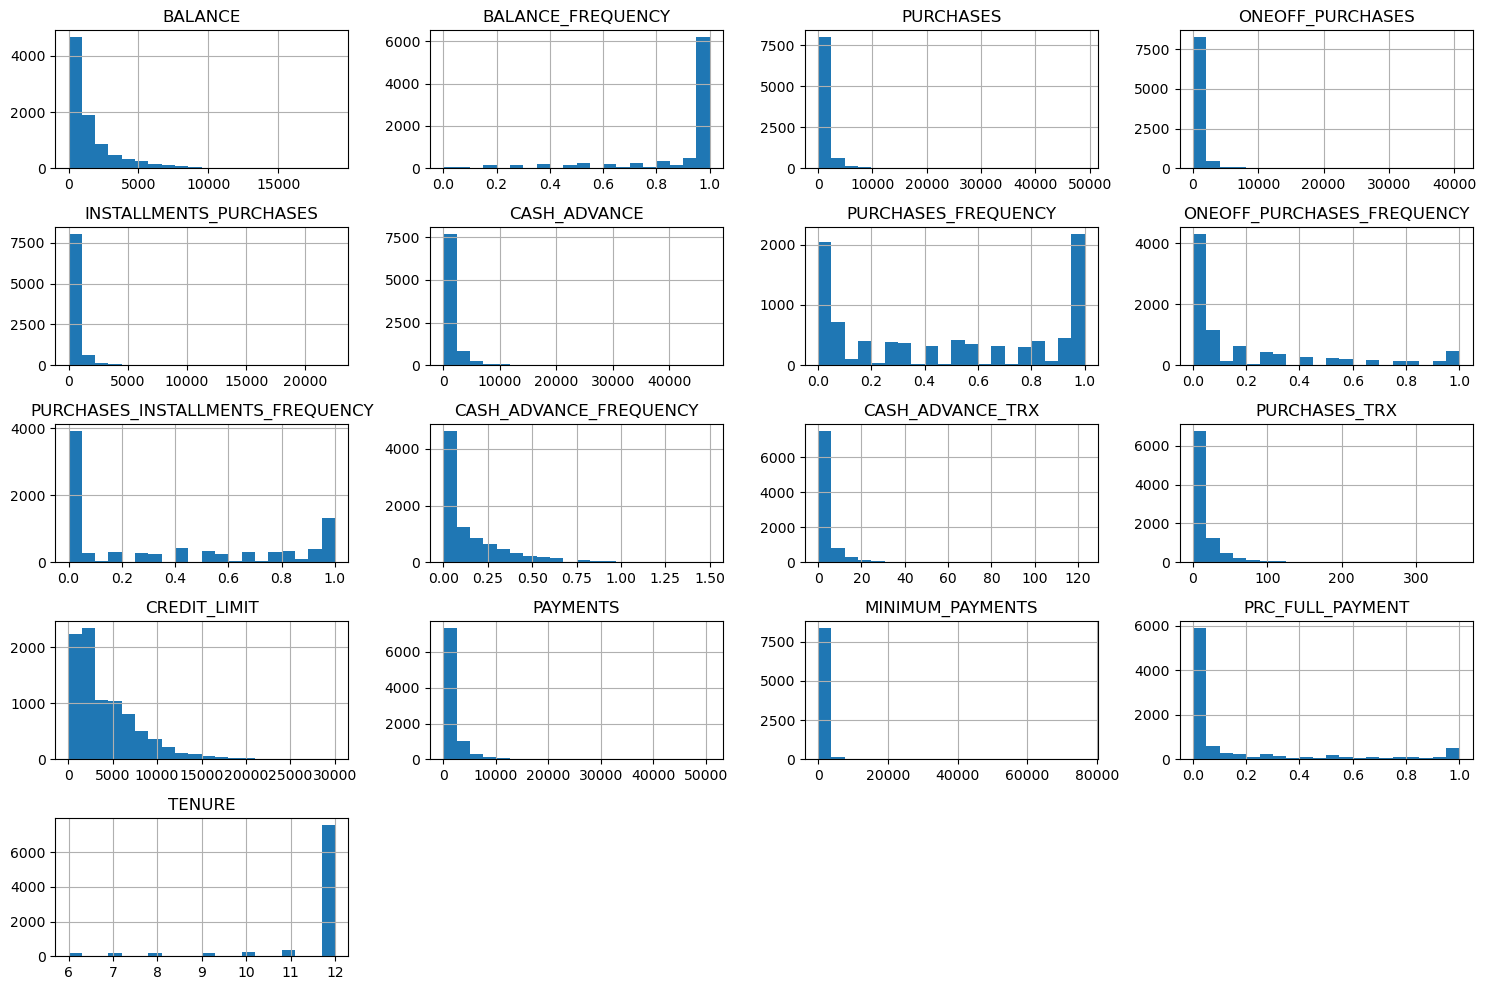

In [7]:
# Visualize distributions of numerical features
data.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

### Correlation matrix between features

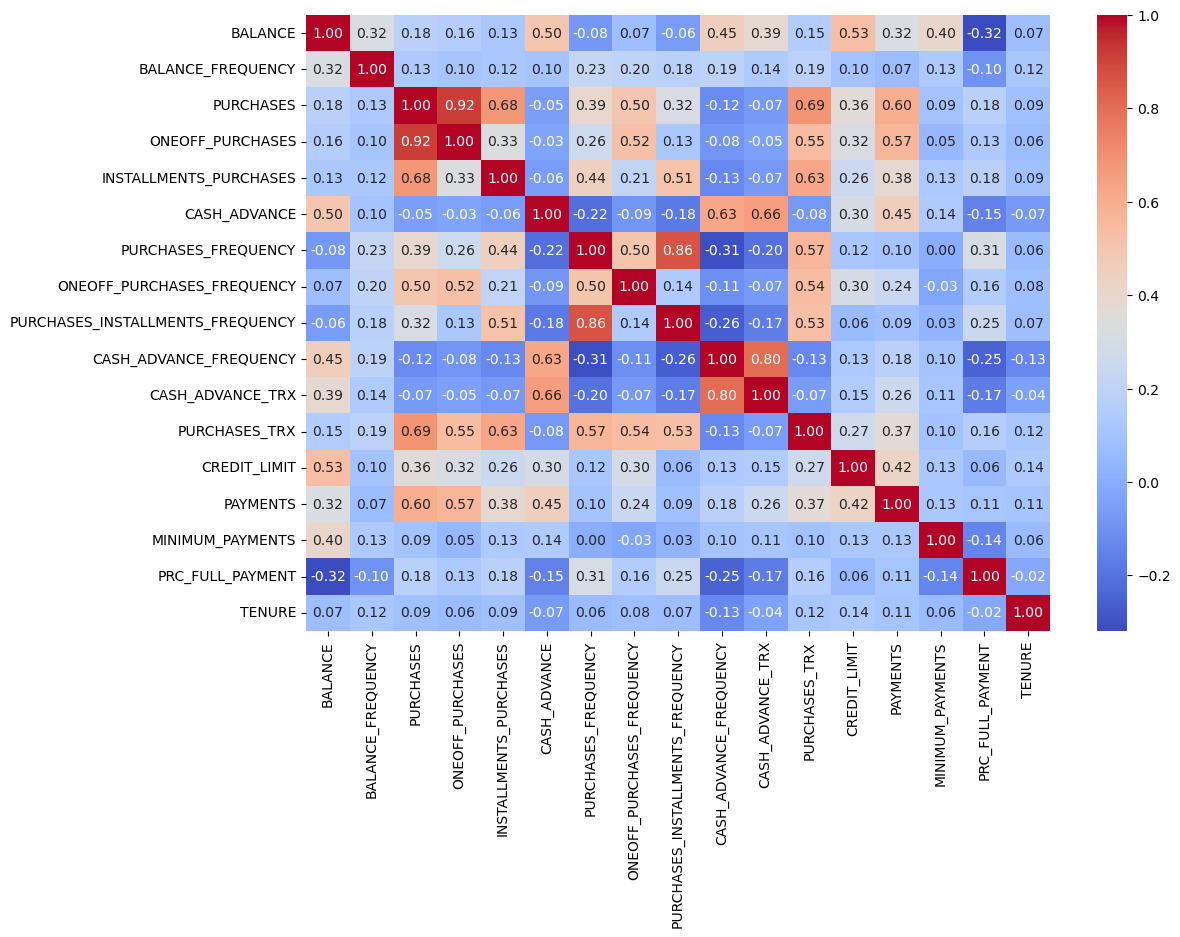

In [8]:
# Correlation matrix
plt.figure(figsize=(12, 8))
data_numeric = data.drop(columns=["CUST_ID"])
sns.heatmap(data_numeric.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

The heatmap provides a visual representation of the correlation coefficients, with colors indicating the strength and direction of the correlations

***Strong Positive Correlations:***
-  `PURCHASES` and `ONEOFF_PURCHASES` (0.92): Indicates that one-off purchases are a major component of total purchases.
- `PURCHASES_INSTALLMENTS_FREQUENCY` and `PURCHASES_FREQUENCY` (0.86): Indicates that the frequency of installment purchases is closely related to the overall frequency of purchases.
- `CASH_ADVANCE` and `CASH_ADVANCE_TRX` (0.66): Indicates that the amount of cash advances is strongly related to the number of cash advance transactions.

***Moderate Positive Correlations:***

- `CREDIT_LIMIT` and `BALANCE` (0.53): Suggests that higher credit limits are associated with higher balances.
- `PURCHASES` and `PURCHASES_TRX` (0.69): Indicates a moderate relationship between total purchases and the number of purchase transactions.
- `PAYMENTS` and `PURCHASES` (0.60):
Indicates that higher payments are associated with higher purchase amounts

***Strong Negative Correlations:***

- `PRC_FULL_PAYMENT` and `BALANCE` (-0.32): Indicates that a higher percentage of full payments is associated with lower balances.

***Moderate Negative Correlations:***

- `CASH_ADVANCE_FREQUENCY` and `PURCHASES_INSTALLMENTS_FREQUENCY` (-0.31):
Suggests that frequent cash advances are associated with less frequent installment purchases.

### Analytical Points from EDA:

**1. Customer Engagement:**
The high mean balance ($1,564) and frequent balance (average balance frequency of ~0.9) indicate active account management and regular transactions by customers.

**2. Spending Behavior:**
With an average purchase amount of $1,000 and an average one-off purchase amount of ~$600, customers seem to engage in both frequent smaller purchases and occasional larger one-off purchases.

**3. Low Frequency Transactions:**
The generally low average frequencies for one-off purchases, installment purchases, and cash advances suggest that while customers do make these types of transactions, they do so infrequently.

**4. Credit Utilization:**
The average credit limit of $4,500 suggests that the bank extends a significant amount of credit to its customers. However, the actual usage and payment patterns (such as the 15% full payment rate) indicate varying levels of credit utilization and repayment behavior.

**5. Financial Responsibility:**
The relatively low percentage of full payments (15%) might indicate that a large proportion of customers are not paying off their balances in full each month, which could lead to higher interest income for the bank but also suggests potential financial strain on customers.

**6. Customer Loyalty:**
An average tenure of 11 years highlights a strong customer loyalty and long-term relationship with the bank, which is a positive indicator of customer satisfaction and retention.

**7. Marketing Strategy Implications:**
These insights can help the marketing team tailor their campaigns to different customer segments. For example, they could target customers with high balances and low payment rates with offers for balance transfer or debt consolidation products, or incentivize frequent small purchasers with rewards programs.

## 4. Data Preprocessing

Handle missing values and prepare the data for clustering:

In [9]:
# Drop non-numeric columns if necessary (e.g., CUST_ID)
data = data.drop(columns=["CUST_ID"])

In [10]:
# Fill missing values with mean
data = data.fillna(data.mean())

In [11]:
# Check if any missing value again
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [12]:
# Let's see if we have duplicated entries in the data
data.duplicated().sum()

0

## 5. Feature Scalling

Standardize the features before clustering:

In [13]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [14]:
scaled_data.shape

(8950, 17)

In [15]:
scaled_data

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755, -0.52555097,
         0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,  0.2342269 ,
         0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318, -0.52555097,
         0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,  0.32919999,
        -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,  0.32919999,
        -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642, -0.52555097,
        -4.12276757]])

***Why do we need scaling data before clustering ?***

> Scaling data before clustering is important because many clustering algorithms rely on distance measures, such as Euclidean distance, to determine the similarity between data points. If the data is not scaled, features with larger ranges can dominate the distance calculations, potentially skewing the results.
>
> Common methods for scaling data include:
>
> - **Standardization**: Transforming the data to have a mean of zero and a standard deviation of one.
> - **Normalization**: Scaling the data to a specific range, usually [0, 1] or [-1, 1].
>
> By scaling the data, you ensure that the clustering results are more reliable and meaningful.

## 6. Model Training

### Apply K-Means clustering

Apply K-Means clustering and determine the optimal number of clusters

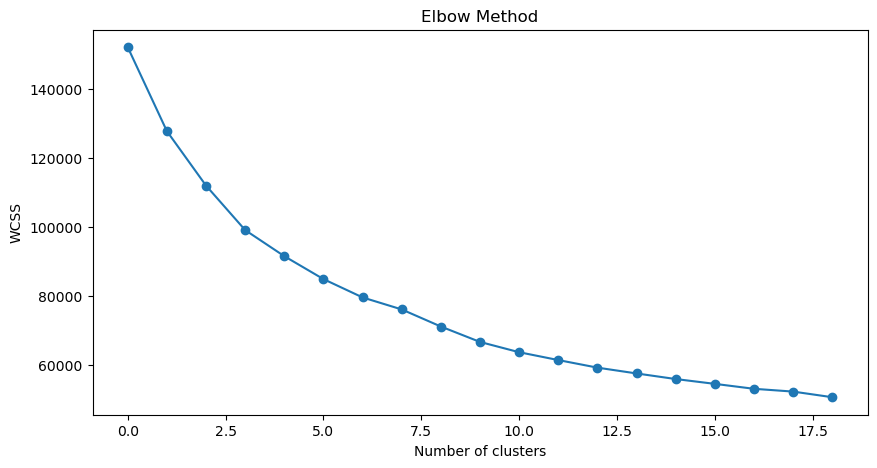

In [16]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 20):
    kmeans = KMeans(
        n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=42
    )
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(10, 5))
plt.plot(wcss, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

Choose the optimal number of clusters (e.g., 7 based on the elbow method) and fit the K-Means model:

In [17]:
# Fit K-Means model
optimal_clusters = 7  # Based on the elbow method
kmeans = KMeans(
    n_clusters=optimal_clusters,
    init="k-means++",
    max_iter=300,
    n_init=10,
    random_state=42,
)

kmeans.fit(scaled_data)
kmeans

KMeans(n_clusters=7, n_init=10, random_state=42)

In [18]:
# Cluster_center
kmeans.cluster_centers_.shape

(7, 17)

In [19]:
# Cluster_center
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=[data.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.430238,0.419467,6.915048,6.083034,5.172266,0.038778,1.090699,1.879303,1.049413,-0.249227,-0.038166,4.646228,2.198371,4.783704,1.080945,0.824001,0.334613
1,1.666473,0.392099,-0.205327,-0.149913,-0.210162,1.990753,-0.456789,-0.190269,-0.404044,1.908547,1.922104,-0.241414,1.007587,0.834821,0.552973,-0.391161,0.069807
2,0.126801,0.429730,0.939029,0.895888,0.574411,-0.309125,1.092770,1.872513,0.534806,-0.410394,-0.320751,1.196848,0.701672,0.385048,-0.057462,0.456446,0.307642
3,-0.367555,0.330562,-0.039840,-0.234950,0.337266,-0.368099,0.980609,-0.357343,1.173200,-0.477687,-0.362424,0.173897,-0.278236,-0.221810,-0.015735,0.307237,0.252156
4,-0.335506,-0.348076,-0.284525,-0.208973,-0.288475,0.065539,-0.198735,-0.272572,-0.230755,0.304112,-0.002216,-0.385586,-0.556898,-0.390701,-0.209383,0.012899,-3.193765
5,0.007813,0.402983,-0.343915,-0.225214,-0.399316,-0.104212,-0.810261,-0.336386,-0.752275,0.084852,-0.041723,-0.464616,-0.301035,-0.248908,-0.015791,-0.452844,0.272305
6,-0.701872,-2.134325,-0.306924,-0.230292,-0.302515,-0.323078,-0.547138,-0.427951,-0.441452,-0.522249,-0.376815,-0.416568,-0.172739,-0.201746,-0.257554,0.295010,0.200781


**Cluster Centers**

In [20]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers, columns=[data.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,4541.393882,0.976638,15777.311395,10689.027791,5088.283605,1060.190695,0.928101,0.763090,0.781501,0.085271,2.988372,130.197674,12493.023256,15581.496801,3383.304083,0.394721,11.965116
1,5033.096672,0.970155,564.520447,343.613277,221.020895,5153.573564,0.307019,0.145697,0.203860,0.517064,16.365772,8.709172,8160.463697,4149.870001,2152.885952,0.039307,11.610738
2,1828.399674,0.979070,3009.455142,2079.427650,930.500678,330.620880,0.928932,0.761065,0.576983,0.053020,1.059937,44.458991,7047.418985,2847.821449,730.293998,0.287217,11.929022
3,799.439665,0.955578,918.085545,202.468866,716.053491,206.951098,0.883916,0.095855,0.830697,0.039554,0.775550,19.032274,3482.112568,1091.026929,827.537625,0.243576,11.854768
4,866.148306,0.794815,395.311749,245.585564,150.203132,1116.308792,0.410589,0.121144,0.272729,0.196000,3.233704,5.125596,2468.226470,602.104087,376.247870,0.157487,7.243243
5,1580.736068,0.972734,268.425678,218.628807,49.971063,760.334088,0.165154,0.102107,0.065464,0.152124,2.964097,3.161211,3399.161094,1012.580763,827.406808,0.021266,11.881732
6,103.587241,0.371669,347.456361,210.199629,137.506773,301.361116,0.270757,0.074792,0.188993,0.030637,0.677338,4.355518,3865.955724,1149.108580,263.988609,0.240000,11.786015


**Classify data into clusters**

In [21]:
markdown_text = f"Our account data is now classified into `{optimal_clusters}` clusters"
Markdown(markdown_text)

Our account data is now classified into `7` clusters

In [22]:
# Predict cluster from scaled_data
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the original data
data["Cluster"] = clusters
data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,5
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,5
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,4
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,4
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,4
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,4


Let's view account distribution by `7` clusters

Cluster
5    2841
3    2046
2    1267
6    1187
1     894
4     629
0      86
Name: count, dtype: int64
Cluster
5    2841
3    2046
2    1267
6    1187
1     894
4     629
0      86
Name: count, dtype: int64


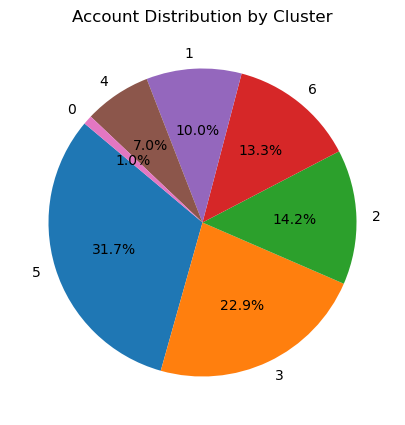

In [23]:
# Total account by cluster
cluster_counts = data["Cluster"].value_counts()
print(cluster_counts)

# Plot the pie chart
plt.figure(figsize=(8, 5))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Account Distribution by Cluster")
plt.show()

### Apply Principal Component Analysis (PCA)

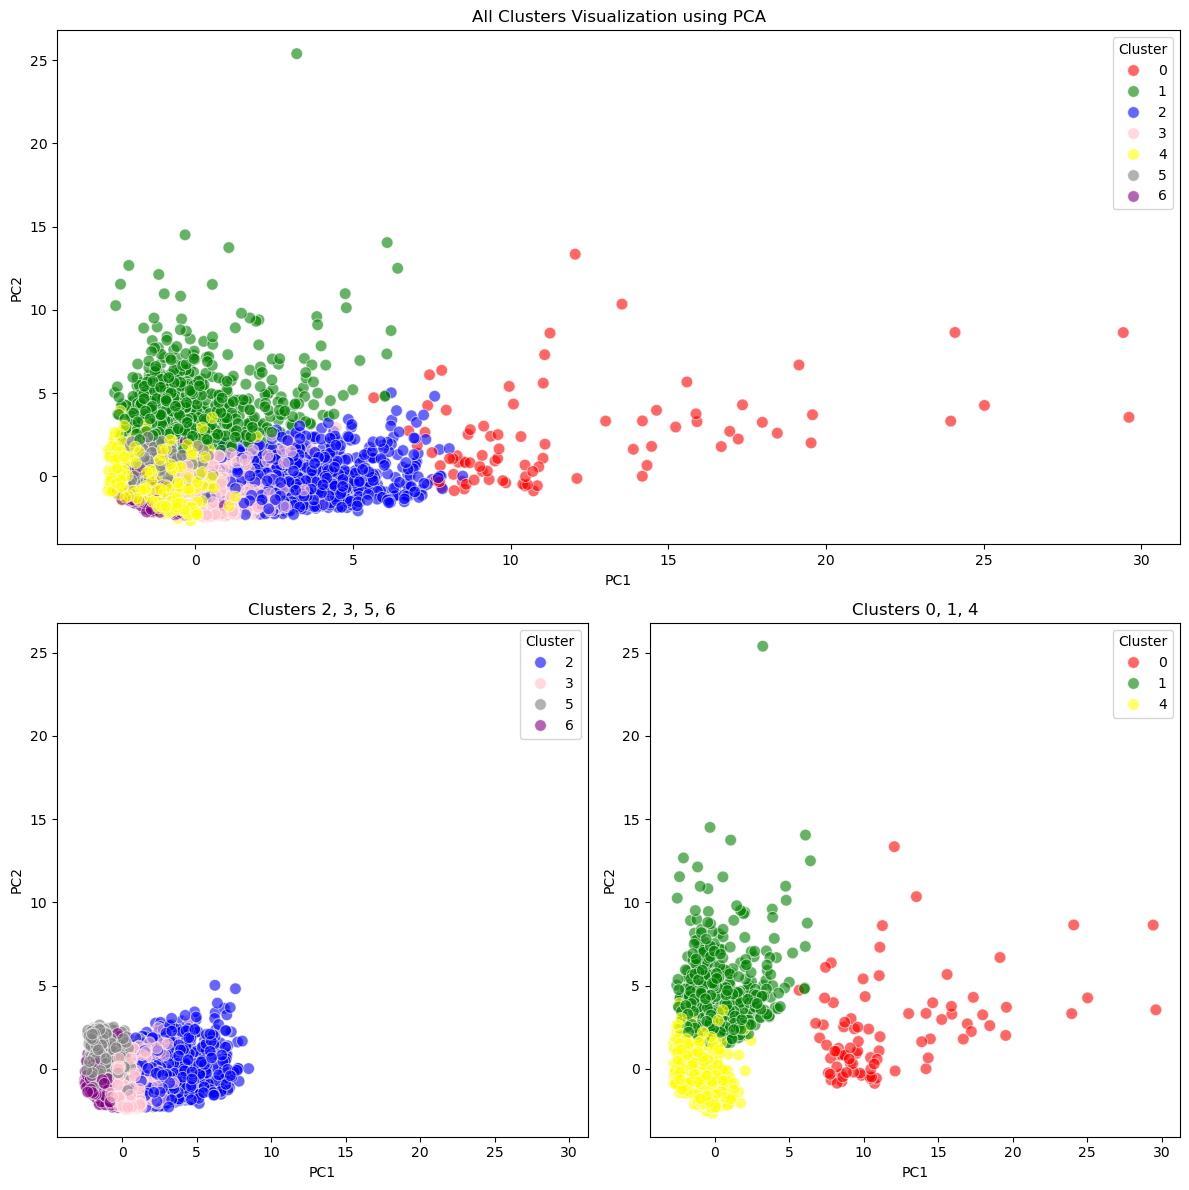

In [38]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
pc_df = pd.DataFrame(data=principal_components, columns=["PC1", "PC2"])
pc_df["Cluster"] = clusters

# Create DataFrames for the different cluster groups
pc_df_all = pc_df.copy()
pc_df_2356 = pc_df[pc_df["Cluster"].isin([2, 3, 5, 6])].copy()
pc_df_014 = pc_df[pc_df["Cluster"].isin([0, 1, 4])].copy()

# Set up the figure with GridSpec
fig = plt.figure(figsize=(12, 12))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1])

# Plot for all clusters in the first row spanning both columns
ax1 = fig.add_subplot(gs[0, :])
sns.scatterplot(
    x="PC1", y="PC2", hue="Cluster", data=pc_df_all,
    palette=["red", "green", "blue", "pink", "yellow", "gray", "purple", "black"],
    s=70, alpha=0.6, ax=ax1
)
ax1.set_title("All Clusters Visualization using PCA")
##ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Determine limits for x and y axes from the first plot
x_limits = ax1.get_xlim()
y_limits = ax1.get_ylim()

# Plot for clusters 2, 3, 5, and 6 in the second row, first column
ax2 = fig.add_subplot(gs[1, 0])
sns.scatterplot(
    x="PC1", y="PC2", hue="Cluster", data=pc_df_2356,
    palette=["blue","pink", "gray", "purple"],
    s=70, alpha=0.6, ax=ax2
)
ax2.set_title("Clusters 2, 3, 5, 6")
ax2.set_xlim(x_limits)
ax2.set_ylim(y_limits)
##ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Plot for clusters 0, 1, and 4 in the second row, second column
ax3 = fig.add_subplot(gs[1, 1])
sns.scatterplot(
    x="PC1", y="PC2", hue="Cluster", data=pc_df_014,
    palette=["red", "green", "yellow"],
    s=70, alpha=0.6, ax=ax3
)
ax3.set_title("Clusters 0, 1, 4")
ax3.set_xlim(x_limits)
ax3.set_ylim(y_limits)
#ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


## 7. Model Evaluation and Conclusions

Evaluate the clustering result using silhouette score:

In [25]:
# Calculate silhouette score
sil_score = silhouette_score(scaled_data, clusters)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.21503808606365246
Silhouette Score: 0.21503808606365246


A silhouette score of 0.215 suggests that the clusters might be overlapping or not distinctly separated and indicates room for improvement. 

### Categorize into Four Groups

To analyze the cluster centers into four significant groups, we will examine various attributes and categorize the rows based on similarities and differences. Here is a detailed breakdown:

1. **High Spending and High Balance**
    - This group has high balances and high spending on purchases, including both one-off and installment purchases. They also have high credit limits and good payment histories.
    - Examples:
        - **Row 0**: Balance of $4541.39, high purchases ($15777.31), and a substantial credit limit ($12493.02).
        - **Row 2**: Balance of $1828.40, significant purchases ($3009.46), and a high credit limit ($7047.42).
    - These customers are actively using their credit and have significant balances. They are ***likely to be valuable clients due to their high engagement and spending***.

2. **High Balance but Low Spending**
    - This group has high balances and credit limits but low purchase amounts and frequencies, indicating lower transaction activity.
    - Examples:
        - **Row 1**: Balance of $5033.10, but low purchases ($564.52) and high cash advance ($5153.57).
        - **Row 5**: Balance of $1580.74, with lower purchases ($268.43) and a relatively high cash advance ($760.33).
    - These customers have high credit limits but are not utilizing them much. They may be ***less engaged or could be saving their credit for future use***.

3. **Low Balance and High Cash Advance**
    - This group has lower balances but high cash advances with modest purchase amounts. They show a higher frequency of cash advances relative to purchases.
    - Examples:
        - **Row 3**: Balance of $799.44, with high cash advance ($206.95) and low purchase activity ($918.09).
        - **Row 6**: Balance of $103.59, with high cash advance ($301.36) and low purchases ($347.46).
    - These customers frequently use cash advances despite having lower balances. They might be ***facing financial difficulties or prefer cash over credit***.

4. **Low Balance and Low Spending**
    - This group has low balances and spending across all purchase categories, indicating minimal activity and expenditure.
    - Examples:
        - **Row 6**: Balance of $103.59, with minimal purchases ($347.46) and low credit limit ($3865.96).
        - **Row 4**: Balance of $866.15, with low purchases ($395.31) and a lower credit limit ($2468.23).
            - Additionally, the accounts in Row 4 have a tenure of 7.2, the lowest among all others. This suggests these customers have used their credit accounts for a shorter period compared to the rest.
    - This group shows minimal engagement with their credit accounts. They have low balances and low spending, suggesting limited usage or disinterest. This group might ***include new accounts that have not fully explored the features and benefits of their credit accounts***.
    
This classification can help the company target different customer segments and personalize their financial products or interventions.